# Project on credit card fraud detection :

### Introduction
The objective in this project is to build machine learning models to classify or identify fraudulent card transactions from a given card transactions data.  

### Data Description

The [dataset](https://www.kaggle.com/mlg-ulb/creditcardfraud/data) contains two-days credit card transactions made in September 2013 by European cardholders. The dataset is highly unbalanced with a low percentage of fraudulent transactions within several records of normal transactions. The positive class (frauds) account for 0.172% (492 frauds out of 284,807 transactions) of all transactions.

Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.  Feature 'Class' is the target variable with value 1 in case of fraud and 0 otherwise. 

## Import Libraries

In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
%matplotlib inline

### Load Data  
The dataset used in this project is freely available at: https://www.kaggle.com/mlg-ulb/creditcardfraud/data

In [2]:
data=pd.read_csv(r"creditcard.csv")

## Data exploration

In [3]:
#Pandas profiling provides analysis like type, unique values, missing values, quantile statistics, mean, mode, median, standard deviation, sum, skewness, frequent values, histograms, correlation between variables, count, heatmap visualization, etc.
from pandas_profiling import ProfileReport

In [4]:
ProfileReport(data)

Number of variables,31
Number of observations,284807
Total Missing (%),0.0%
Total size in memory,67.4 MiB
Average record size in memory,248.0 B
Numeric,30
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [5]:
# View top 5 records
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# determine the number of records in the dataset
data.shape

(284807, 31)

In [7]:
# check for missing values and data types of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [8]:
#it used for check the null values 
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# it is used for the check duplicate row
data.duplicated().sum()

1081

In [10]:
#it use to  drop the duplicate row
data.drop_duplicates(inplace=True)

In [11]:
#afte drop the duplicate row we get the shape
data.shape

(283726, 31)

## Pre-processing

In [12]:
#Standardize data - Scale the data to have zero mean and unit variance. it is available  on scikit packages
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)

In [13]:
# after scale the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813


In [14]:
# drop the time table it is not required 
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813


In [15]:
# feature data (predictors
X = data.iloc[:, data.columns != 'Class']
# label class
y = data.iloc[:, data.columns == 'Class']

In [16]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


### Partition data into train and test sets

In [17]:
# Partition data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [18]:
# determine the number of records in the X_train
X_train.shape

(198608, 29)

In [19]:
# determine the number of records in the X_test
X_test.shape

(85118, 29)

## Train Models  
Using the machine learning algorithms

### Decision trees

In [20]:
# impoting the decision tree algorithm in the scikit packages
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [21]:
# Train Decision Tree Model
decision_tree.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier()

In [22]:
y_pred = decision_tree.predict(X_test)

In [23]:
decision_tree.score(X_test,y_test)

0.9992833478230222

In [24]:
y_pred = decision_tree.predict(X)

In [25]:
y_expected = pd.DataFrame(y)

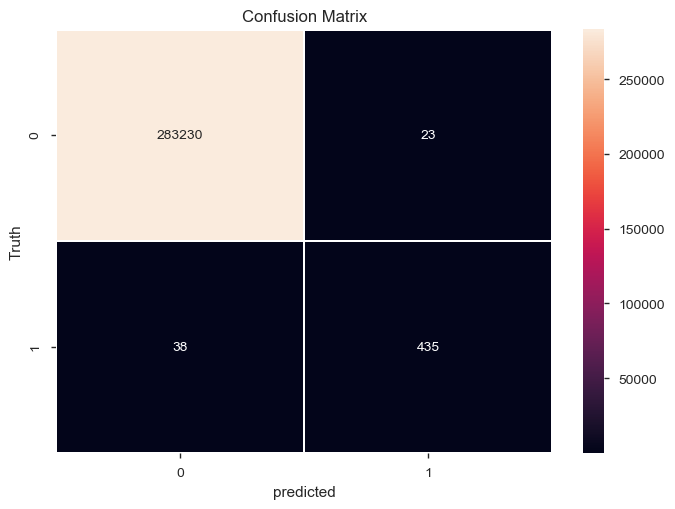

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_expected, y_pred)
sns.heatmap(cm, annot=True,linewidths=1,fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [27]:
print(classification_report(y_expected, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    283253
           1       0.95      0.92      0.93       473

    accuracy                           1.00    283726
   macro avg       0.97      0.96      0.97    283726
weighted avg       1.00      1.00      1.00    283726



##  Stratified K-Fold Cross-Validation
Provides train/test indices to split data in train/test sets. This cross-validation object is a variation of KFold that returns stratified fold

In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
accuracy=[]
skf=StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
skf.get_n_splits(X,y)
for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    
    decision_tree.fit(X_train,y_train.values.ravel())
    y_pred = decision_tree.predict(X_test)
    score=accuracy_score(y_pred,y_test)
    accuracy.append(score)
print(accuracy)

TRAIN: [ 10855  11299  11666 ... 283723 283724 283725] TEST: [    0     1     2 ... 28416 28417 28418]
TRAIN: [     0      1      2 ... 283723 283724 283725] TEST: [10855 11299 11666 ... 56806 56807 56808]
TRAIN: [     0      1      2 ... 283723 283724 283725] TEST: [29979 30191 30261 ... 85179 85180 85181]
TRAIN: [     0      1      2 ... 283723 283724 283725] TEST: [ 45010  45534  46709 ... 113536 113537 113538]
TRAIN: [     0      1      2 ... 283723 283724 283725] TEST: [ 77084  77379  79220 ... 141888 141889 141890]
TRAIN: [     0      1      2 ... 283723 283724 283725] TEST: [115676 115941 117841 ... 170292 170293 170294]
TRAIN: [     0      1      2 ... 283723 283724 283725] TEST: [150068 150071 150078 ... 198641 198642 198643]
TRAIN: [     0      1      2 ... 283723 283724 283725] TEST: [156390 156392 156978 ... 226999 227000 227001]
TRAIN: [     0      1      2 ... 283723 283724 283725] TEST: [212365 213905 214018 ... 255376 255377 255378]
TRAIN: [     0      1      2 ... 2553

In [29]:
np.array(accuracy).mean()

0.9986113400900709

## Random forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
random_forest = RandomForestClassifier(n_estimators=100)

In [32]:
random_forest.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

In [33]:
y_pred = random_forest.predict(X_test)

In [34]:
random_forest.score(X_test,y_test)

0.9993303256731989

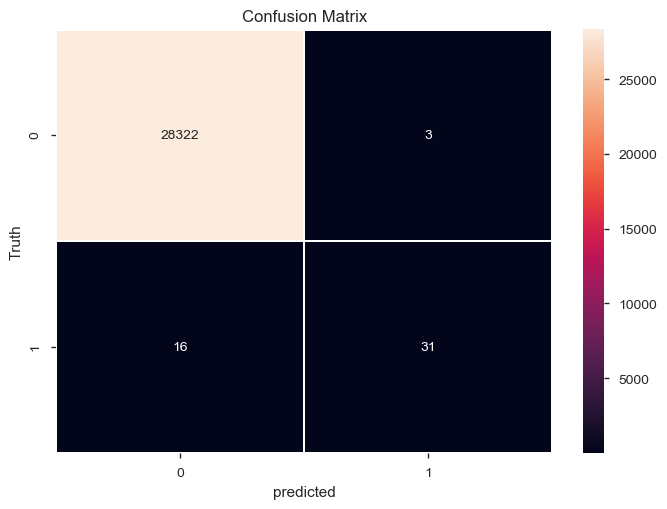

In [35]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,linewidths=1,fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In the above analysis we have applied two algorithms that is Decision tree and random forest algorithm and found that 
we are getting more accuracy in random forest algorithm , i.e. our model is predicting only 16 fraud transaction as valid 
transaction .

## END